<a href="https://colab.research.google.com/github/neuralresearch/CS39-6/blob/keyuanren/RenTaGSim_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preparation

###Data Loading and observation

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive
id = '1E07PMf68jMo-rULzHfE_q7chqgaYGsXp'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AIDS700.zip')
!ls

AIDS700.zip  sample_data


In [2]:
#if AIDS700nef exist do not run this part
#removing the dialog
%%capture
#unzip the file
!unzip AIDS700.zip

In [3]:
# collecting all the Node types and Edge types from entire AIDS700 dataset
import os
import networkx as nx

dirName = 'AIDS700nef/train/'
filenames = os.listdir(dirName)
dirName_test = 'AIDS700nef/test/'
filenames_test = os.listdir(dirName_test)
Node_Types = []
Edge_Types = []
for filename in filenames:
    if filename.endswith(".gexf"):
        #print(filename)
        temp =  nx.read_gexf(path=dirName+"/"+filename)
        for node in temp.nodes:
            temp_type = temp.nodes[node]['type']
            if temp_type not in Node_Types:
                Node_Types.append(temp_type)
        for edge in temp.edges:
            temp_type = temp.edges[edge]['valence']
            if temp_type not in Edge_Types:
                Edge_Types.append(temp_type)
for filename in filenames_test:
    if filename.endswith(".gexf"):
        #print(filename)
        temp =  nx.read_gexf(path=dirName_test+"/"+filename)
        for node in temp.nodes:
            temp_type = temp.nodes[node]['type']
            if temp_type not in Node_Types:
                Node_Types.append(temp_type)
        for edge in temp.edges:
            temp_type = temp.edges[edge]['valence']
            if temp_type not in Edge_Types:
                Edge_Types.append(temp_type)
print(Node_Types)
print(Edge_Types)

['O', 'C', 'N', 'S', 'Sb', 'Pd', 'Cl', 'Cu', 'Si', 'P', 'Br', 'Pt', 'F', 'Hg', 'Ru', 'B', 'As', 'Pb', 'I', 'Ho', 'Li', 'Bi', 'Tb', 'Co', 'Ga', 'Sn', 'Se', 'Te', 'Ni']
[1, 3, 2]


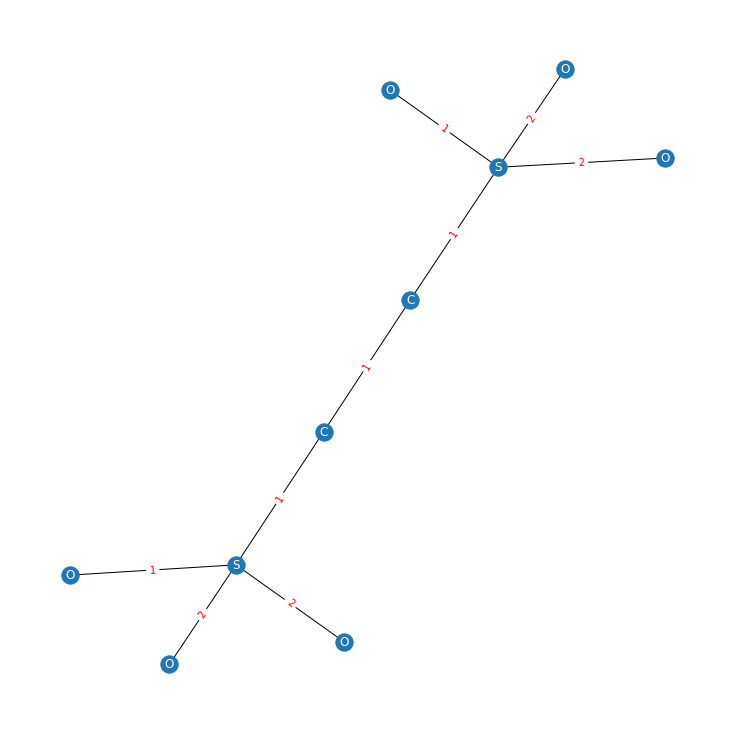

Node Info:  {'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}
Edge Info:  {('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
7  :  {'3': {'valence': 2, 'id': '6'}}
3  :  {'7': {'valence': 2, 'id': '6'}, '1': {'valence': 1, 'id': '2'}, '8': {'valence': 2, 'id': '7'}, '9': {'valence': 1, 'id': '8'}}
5  :  {'2': {'valence': 2, 'id': '4'}}
8  :  {'3': {'valence': 2, 'id': '7'}}
6  :  {'2': {'valence': 1, 'id': '5'}}
1  :  {'3': {'valence': 1, 'id': '2'}, '0': {'valence': 1, 'id': '0'}}
9  :  {'3': {'valence': 1, 'id': '8'}}
0  :  {'1': {'valence': 1, 'id': '0'}, '2': {'valence': 1, 'id': '1'}}
4  :  {'2': {'valence': 2, 'id': '3'}}
2  :  {'5': {'valence': 2, 'id': '4'}, '6': {'valence': 1, 'id': '5'}, '0': {'valence': 1, 'id': '1'}, '4': {'valence': 2, 'id': '3'}}


In [4]:
#visualise the first network data: 1011.gexf
import matplotlib.pyplot as plt

#read the 1011.gexf
Graph = nx.read_gexf('AIDS700nef/train/4.gexf',version='1.2draft')

node_info = nx.get_node_attributes(Graph, 'type')
edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in Graph.edges(data=True)])

#graph display
pos = nx.spring_layout(Graph, scale=1.5)  
plt.figure(1,figsize=(10,10)) 
nx.draw(Graph, pos, labels=node_info, font_color="white")
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_info, font_color="red")
plt.show()

#info display
print("Node Info: ",node_info)
print("Edge Info: ",edge_info)
# numpy_graph = nx.to_numpy_array(Graph, nodelist = node_info)
# print(numpy_graph)
# adjacency representation of graph as a dictionary of dictionaries
adj_graph = nx.to_dict_of_dicts(Graph)
for key, value in adj_graph.items():
    print(key, ' : ', value)

### Graph Pair Generator

['7', '3', '5', '8', '6', '1', '9', '0', '4', '2']
[('7', '3'), ('3', '1'), ('3', '8'), ('3', '9'), ('5', '2'), ('6', '2'), ('1', '0'), ('0', '2'), ('4', '2')]
Node info:  {'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}
Edge info:  {('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}
The GEV:  [3, 3, 3, 4, 1, 1]
Select Edge(6, 2) and its label 1 to relabel with 2
Select Edge(3, 1) and its label 1 to relabel with 2
Select Edge(3, 8) and its label 2 to relabel with 3
Edge between label 3 and label 8 is removed
[('3', '8')]
Select Node 6 and its label O to relabel with Tb
Select Node 0 and its label C to relabel with Ga
Graph display after the transformation:
Transformed Node info:  {'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'Tb', '1': 'C', '9': 'O', '0': 'Ga', '4': 'O', '2': 'S'}
Transformed Edge info:  {('7', '3'): 2, ('3', '1'): 2, ('3', '9'): 1, ('

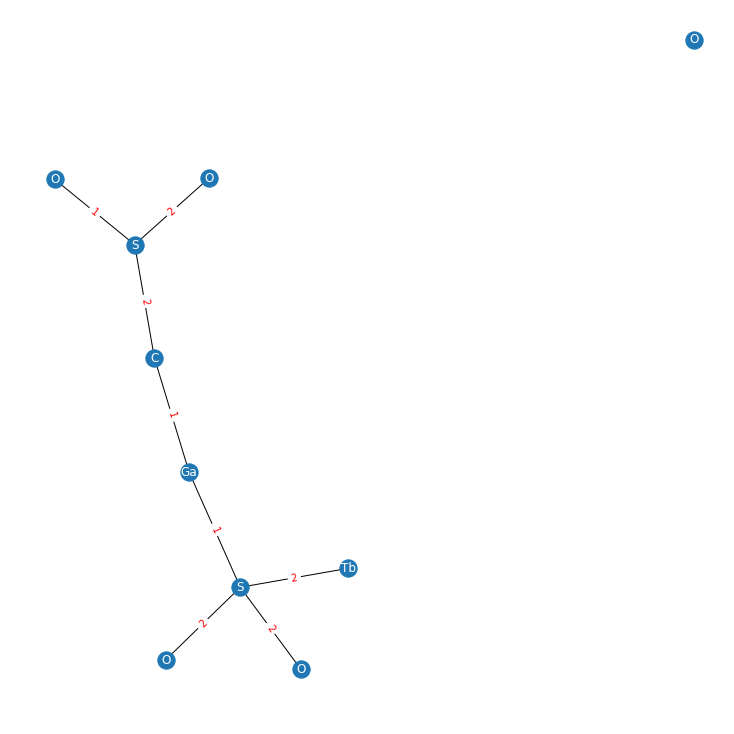

7  :  {'3': {'valence': 2, 'id': '6'}}
3  :  {'7': {'valence': 2, 'id': '6'}, '1': {'valence': 2, 'id': '2'}, '9': {'valence': 1, 'id': '8'}}
5  :  {'2': {'valence': 2, 'id': '4'}}
8  :  {}
6  :  {'2': {'valence': 2, 'id': '5'}}
1  :  {'3': {'valence': 2, 'id': '2'}, '0': {'valence': 1, 'id': '0'}}
9  :  {'3': {'valence': 1, 'id': '8'}}
0  :  {'1': {'valence': 1, 'id': '0'}, '2': {'valence': 1, 'id': '1'}}
4  :  {'2': {'valence': 2, 'id': '3'}}
2  :  {'5': {'valence': 2, 'id': '4'}, '6': {'valence': 2, 'id': '5'}, '0': {'valence': 1, 'id': '1'}, '4': {'valence': 2, 'id': '3'}}


In [5]:
#input of the generator contains origial Graph and target GEV(four types)
#testing one graph first: 1011.gexf
import random
import numpy as np

def graph_pair_generator(graph, ground_GEV):
  target_graph = graph
  node_id = list(target_graph.nodes)
  edge_id = list(target_graph.edges)
  print(node_id)
  print(edge_id)

  node_info = nx.get_node_attributes(target_graph, 'type')
  edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in target_graph.edges(data=True)])

  print("Node info: ", node_info)
  print("Edge info: ", edge_info)
  print("The GEV: ",ground_GEV)
  
  #index of the ground GEV in for loop
  gev_index = 0
  #make sure not to relabel the relabeled node
  relabel_node = []
  #make sure not to relabel the relabeled edge
  relabel_edge = []
  #store the delete edge
  delete_edge = []
  #for fixing the GEV if all nodes or edges are relabeled
  relabel_fix_gev = []

  for edit_type in ground_GEV:
    # print("Relabeled node: ",relabel_node)
    
    node_id = list(target_graph.nodes)
    edge_id = list(target_graph.edges)

    node_info = nx.get_node_attributes(target_graph, 'type')
    edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in target_graph.edges(data=True)])

    if edit_type == 1: #Node Relabeling
      if len(relabel_node) == len(node_id):#when all the nodes are relabeled
        #add another edit operation or remove the edit operation
        new_operation_type = random.choice([2,3,4])
        ground_GEV.append(new_operation_type)
        print("Add new operation type: ",new_operation_type)
        relabel_fix_gev.append(gev_index)
        gev_index += 1
        pass
      else:
        #not choosing the relabed nodes
        random_node = random.choice(node_id)
        while random_node in relabel_node:
          random_node = random.choice(node_id)
        relabel_node.append(str(random_node))
        # update with the selected node and make sure not the same type
        remove_self_type = node_info[str(random_node)]
        Node_Types.remove(remove_self_type)
        new_node_attr = random.choice(Node_Types)
        Node_Types.append(remove_self_type)
        print("Select Node "+random_node+" and its label "+remove_self_type+" to relabel with "+new_node_attr)
        nx.set_node_attributes(target_graph, {str(random_node): {'type': new_node_attr, 'label': str(random_node)}})
        gev_index += 1

    elif edit_type == 2: #Node Insertion / Deletion
      #we are not considering Node Deletion based on the TaGSim Paper
      new_node_type = random.choice(Node_Types)
      new_node_id = str(len(node_id)) #increametal 1 from original ID list
      print("Adding a new node ID: "+new_node_id+" and Type: "+ new_node_type)
      target_graph.add_node(new_node_id, type = new_node_type, label = new_node_id)
      # nx.set_node_attributes(target_graph, {new_node_id: {'type': new_node_type, 'label': new_node_id}})
      gev_index += 1

    elif edit_type == 3: #Edege Relabeling
      
      if len(edge_id) == 0:#when all the edges are relabeled or no edges
        #add another edit operation or remove the edit operation
        new_operation_type = random.choice([1,2,4])
        ground_GEV.append(new_operation_type)
        print("Add new operation type: ",new_operation_type)
        relabel_fix_gev.append(gev_index)
        gev_index += 1
        pass
      else:
        #not choosing the relabed nodes
        random_edge = random.choice(edge_id)
        if random_edge in relabel_edge:
          #add another edit operation or remove the edit operation
          new_operation_type = random.choice([1,2,4])
          ground_GEV.append(new_operation_type)
          print("Add new operation type: ",new_operation_type)
          relabel_fix_gev.append(gev_index)
          gev_index += 1
          pass
        else:
          relabel_edge.append(random_edge)
          # update with the selected edge and make sure not the same type
          remove_self_type = edge_info[random_edge]
          Edge_Types.remove(remove_self_type)
          new_edge_attr = random.choice(Edge_Types)
          Edge_Types.append(remove_self_type)
          selected_edge_id = target_graph.edges[random_edge]['id']
          print("Select Edge("+random_edge[0]+", "+random_edge[1]
                +") and its label "+str(remove_self_type)+" to relabel with "+str(new_edge_attr))
          nx.set_edge_attributes(target_graph, {random_edge: {'valence': new_edge_attr, 'id': selected_edge_id}})
          gev_index += 1

    elif edit_type == 4: #Edge Deletion / Insertion
      #when apply EDI we can randomly chose one of the opreation
      random_choice = random.choice([0,1])
      if random_choice == 0:
        if len(edge_id) == 0:#when no edges then no edge deletion
          #add another edit operation or remove the edit operation
          new_operation_type = random.choice([1,2,3])
          ground_GEV.append(new_operation_type)
          print("Add new operation type: ",new_operation_type)
          relabel_fix_gev.append(gev_index)
          gev_index += 1
          pass
        else:
          #Edge Deletion
          random_edge = random.choice(edge_id)
          delete_edge.append(random_edge) #store the delete edge
          target_graph.remove_edge(random_edge[0], random_edge[1])
          print("Edge between label "+random_edge[0]+" and label "+random_edge[1]+" is removed")
          print(delete_edge)
          gev_index += 1
      else:
        #Edge Insertion
        #inserting new edge can be happend between existing node
        ram_node1 = str(random.choice(node_id))
        ram_node2 = str(random.choice(node_id))
        print("Select Node "+ram_node1+" and Node "+ ram_node2+" for new Edge")
        #making sure two nodes does not have existing connection and not existing in delete edge list
        if (ram_node1,ram_node2) in edge_info or (ram_node1,ram_node2) in delete_edge:
          #add another edit operation or remove the edit operation
          new_operation_type = 2
          ground_GEV.append(new_operation_type)
          print("Add new operation type: ",new_operation_type)
          relabel_fix_gev.append(gev_index)
          gev_index += 1
          pass
        else:
          # while (ram_node1,ram_node2) in edge_info or (ram_node1,ram_node2) in delete_edge:
          #   print("Connecting exist or it is remove edge before, picking a new set!")
          #   ram_node1 = random.choice(node_id)
          #   ram_node2 = random.choice(node_id)
          #   print("Select Node "+ram_node1+" and Node "+ ram_node2+" for new Edge")
          target_graph.add_edge(ram_node1, ram_node2)
          #assigned edge label
          new_edge_type = random.choice(Edge_Types)
          new_edge_id = str(len(edge_id))
          edge_label = {'valence': new_edge_type, 'id':new_edge_id}
          nx.set_edge_attributes(target_graph, {(ram_node1, ram_node2) : edge_label})
          gev_index += 1

  #fixing gev from over relabel after all nodes or edges are relabeled
  counter_node = 1
  for x in relabel_fix_gev:
    del ground_GEV[x-counter_node]
    counter_node += 1
    print("Delete :",x)
    print(ground_GEV)

  print("Graph display after the transformation:")
  node_info = nx.get_node_attributes(target_graph, 'type')
  edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in target_graph.edges(data=True)])
  print("Transformed Node info: ", node_info)
  print("Transformed Edge info: ", edge_info)
  print("Transformed GEV: ", ground_GEV)
  pos = nx.spring_layout(target_graph, scale=1.5)  
  plt.figure(1,figsize=(10,10)) 
  nx.draw(target_graph, pos, labels=node_info, font_color="white")
  nx.draw_networkx_edge_labels(target_graph, pos, edge_labels=edge_info, font_color="red")
  plt.show()

  return graph, target_graph, ground_GEV

#randomly form the gev
#first ram the number of edit operation between 5 to 10
num_operation = random.choice(range(5,11))
GEV = []
for i in range(num_operation):
  #ram the opreation type NR:1, NID:2, ER:3, EID:4
  GEV.append(random.choice(range(1,5)))

# call the graph_pair_generator function with testing graph 4.gexf
# [3,3,3,3,3,3,3,3,3 ,1,1,1,1,1,1,1,1,1,1 ,3,3,1,1,2]
graph, target_graph, GEV =graph_pair_generator(Graph, GEV)
# adjacency representation of graph as a dictionary of dictionaries
adj_graph = nx.to_dict_of_dicts(target_graph)
for key, value in adj_graph.items():
    print(key, ' : ', value)

In [1]:
# generated_temp = nx.generate_gexf(target_graph)
# for line in nx.generate_gexf(target_graph):  
#     print(line)

### Generating Dataset

In [ ]:
#AIDS700nef contains 700 graph
#using the Generator to replicate the dataset with result of 1400 graph
#1120 for training, 280 for testing
dirName_train = 'AIDS700nef/train/'
filenames = os.listdir(dirName_train)

for filename in filenames:
    if filename.endswith(".gexf"):
      #randomly form the gev
      num_operation = 16
      # random.choice(range(5,11))
      GEV = []
      for i in range(num_operation):
        GEV.append(random.choice(range(1,5)))
      
      temp =  nx.read_gexf(path=dirName_train+filename)#get the original graph
      graph, target_graph, GEV = graph_pair_generator(temp, GEV)#form generated graph and ground_true gev
      generated_temp = nx.generate_gexf(target_graph)#convert generated graph into gexf representation
      gev_name = ''.join(map(str,GEV))
      generated_fileName = gev_name+'_'+filename#form file name with (GEV Info|orignialFileName.gexf)
      print(generated_fileName)
      #create the file and add generated graph gexf content
      ge = os.path.join(dirName_train, generated_fileName)
      file = open(ge, "w")
      for line in generated_temp:  
        file.write(line)
      file.close()

In [ ]:
dirName_test = 'AIDS700nef/test/'
filenames = os.listdir(dirName_test)
for filename in filenames:
    if filename.endswith(".gexf"):
      #randomly form the gev
      num_operation = 16
      GEV = []
      for i in range(num_operation):
        GEV.append(random.choice(range(1,5)))
      
      temp =  nx.read_gexf(path=dirName_test+filename)#get the original graph
      graph, target_graph, GEV = graph_pair_generator(temp, GEV)#form generated graph and ground_true gev
      generated_temp = nx.generate_gexf(target_graph)#convert generated graph into gexf representation
      gev_name = ''.join(map(str,GEV))
      generated_fileName = gev_name+'_'+filename#form file name with (GEV Info|orignialFileName.gexf)
      print(generated_fileName)
      #create the file and add generated graph gexf content
      ge = os.path.join(dirName_test, generated_fileName)
      file = open(ge, "w")
      for line in generated_temp:  
        file.write(line)
      file.close()

In [9]:
#size of the train / test file after Graph Generation
dirName_test = 'AIDS700nef/train/'
filenames = os.listdir(dirName_test)
count = 0
for filename in filenames:
    if filename.endswith(".gexf"):
      count += 1
print(count)
dirName_test = 'AIDS700nef/test/'
filenames = os.listdir(dirName_test)
count = 0
for filename in filenames:
    if filename.endswith(".gexf"):
      count += 1
print(count)

1120
280


In [19]:
#Save the updated train / test file back to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!cp -r '/content/AIDS700nef/train' '/content/drive/MyDrive/Sydney Uni/COMP5703 _Capstone Project/Implementation/'

In [17]:
!cp -r '/content/AIDS700nef/test' '/content/drive/MyDrive/Sydney Uni/COMP5703 _Capstone Project/Implementation/'